In [161]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties



## read the simulation parameter

In [162]:
step="014175"

In [163]:
with open("../tmpguo/plbLog.dat","r") as fp:
    para=fp.read()
print(para)

Poiseuille flow

Velocity in lattice units: u=0.148148
Reynolds number:           Re=280
Lattice resolution:        N=210
Relaxation frequency:      omega=1.2
Extent of the system:      lx=2
Extent of the system:      ly=1
Extent of the system:      lz=0
Grid spacing deltaX:       dx=0.0047619
Time step deltaT:          dt=0.000705467



In [164]:
dx=1.0/210
nx=421
ny=211
lx=(nx-1)*dx
ly=(ny-1)*dx
cell_num=nx*ny
print("cell number",cell_num)

cell number 88831


In [165]:
x_lb=np.arange(0,nx,1)
y_lb=np.arange(0,ny,1)
x_phsy=x_lb*dx
y_phsy=y_lb*dx
grid_x_lb,grid_y_lb=np.meshgrid(x_lb,y_lb)
grid_x_lb=grid_x_lb.T
grid_y_lb=grid_y_lb.T
grid_x_phsy=grid_x_lb*dx
grid_y_phsy=grid_y_lb*dx
print("grid x shape：",grid_x_lb.shape)
print("grid y shape：",grid_y_lb.shape)

grid x shape： (421, 211)
grid y shape： (421, 211)


## Physical Field Contour

### density field

In [166]:
def read_scalar_field_2d(file,nx,ny):
    with open(file,"r") as fp:
        scalar_field_text=fp.read()
    array=np.fromstring(scalar_field_text, dtype=float, sep=' ')
    scalar_field=np.reshape(array,(nx,ny))
    print("scalar field shape：",scalar_field.shape)
    return scalar_field



In [167]:
grid_density=read_scalar_field_2d(f"../tmpguo/density{step}.dat",nx,ny)


scalar field shape： (421, 211)


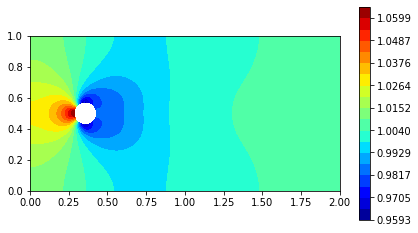

In [168]:
fig, ax = plt.subplots()
levels=np.linspace(np.min(grid_density[grid_density>0]),np.max(grid_density),20)
cp = ax.contourf(grid_x_phsy, grid_y_phsy, grid_density,levels=levels,cmap="jet") #"rainbow"
cb = fig.colorbar(cp, shrink=0.8)
ax.axis([0,lx,0,ly])
ax.set_aspect('equal')
fig.tight_layout()


### velocity norms contour

In [169]:
grid_vel_norms=read_scalar_field_2d(f"../tmpguo/velocityNorm{step}.dat",nx,ny)

scalar field shape： (421, 211)


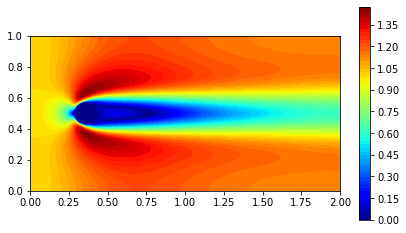

In [170]:
fig2, ax2 = plt.subplots()
cp = ax2.contourf(grid_x_phsy, grid_y_phsy, grid_vel_norms,levels=60,cmap="jet") #"rainbow"
cb = fig2.colorbar(cp, shrink=0.8)
ax2.axis([0,lx,0,ly])
ax2.set_aspect('equal')
fig2.tight_layout()


### velocity quiver

reference:

1. https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/quiver_simple_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-simple-demo-py 

2. https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/quiver_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-demo-py



In [171]:
with open(f"../tmpguo/velocity{step}.dat","r") as fp:
    vel_text=fp.read()
vels=np.fromstring(vel_text, dtype=float, sep=' ')
grid_vels=np.reshape(vels,(nx,ny,2))
grid_vel_x=grid_vels[:,:,0]
grid_vel_y=grid_vels[:,:,1]
print("grid vels：",grid_vels.shape)
print("grid vel x component：",grid_vel_x.shape)
print("grid vel y component：",grid_vel_y.shape)



grid vels： (421, 211, 2)
grid vel x component： (421, 211)
grid vel y component： (421, 211)


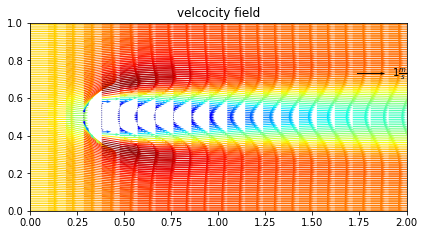

In [172]:
fig3, ax3 = plt.subplots()
x_sparse_factor=20
y_sparse_factor=2
M = np.hypot(grid_vel_x, grid_vel_y)
Q = ax3.quiver(grid_x_phsy[::x_sparse_factor,::y_sparse_factor], grid_y_phsy[::x_sparse_factor,::y_sparse_factor], 
    grid_vel_x[::x_sparse_factor,::y_sparse_factor], grid_vel_y[::x_sparse_factor,::y_sparse_factor], 
    M[::x_sparse_factor,::y_sparse_factor], units='x', pivot='tail', width=0.005,scale=1 / 0.15,cmap="jet")
# fig3.colorbar(Q)
qk = ax3.quiverkey(Q, 0.9, 0.65, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
ax3.set_title("velcocity field")                   
ax3.axis([0,lx,0,ly])
ax3.set_aspect('equal')
fig3.tight_layout()

### streamline 
reference: https://matplotlib.org/gallery/images_contours_and_fields/plot_streamplot.htmlm

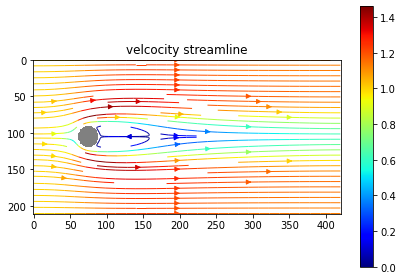

In [173]:
fig4, ax4 = plt.subplots()

## stream plot
M = np.hypot(grid_vel_x, grid_vel_y)
strm = ax4.streamplot(x_lb,y_lb,grid_vel_x.T,grid_vel_y.T, color=M.T, linewidth=1, cmap='jet')
fig4.colorbar(strm.lines)

## create mask
import math
mask = np.zeros(grid_vel_x.shape, dtype=bool)
cx=75
cy=105
radius=15
for i in np.arange(0,mask.shape[0],1):
    for j in np.arange(0,mask.shape[1],1):
        if (i-cx)**2+(j-cy)**2<=radius**2:
            mask[i,j]=1
mask = np.ma.masked_where(mask==0, mask)
ax4.imshow(~mask.T, alpha=0.5, cmap='gray', aspect='auto')

ax4.set_title("velcocity streamline")                   
ax4.set_aspect('equal')
fig4.tight_layout()


## Line Plot

In [174]:
font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('normal')
font.set_size(12)

Text(0.5, 1.0, 'Velocity x Along the Box Centerline')

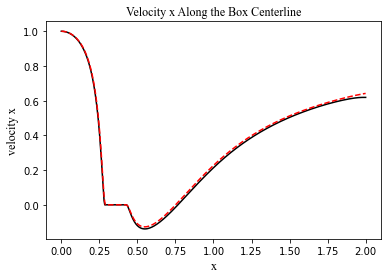

In [189]:
y_mid=105
vel_on_y_mid=grid_vel_x[:,y_mid]
fig,ax=plt.subplots()
ax.plot(x_phsy,vel_on_y_mid,"-k")


with open("./guo_ux_centerline.dat","r") as fp:
    previous_results_text=fp.read()
    previous_results=np.fromstring(previous_results_text, dtype=float, sep=' ')
previous_ux_centerline=np.reshape(previous_results,(422,2))
xx=previous_ux_centerline[:,0]/np.max(previous_ux_centerline)*2
ux=previous_ux_centerline[:,1]

ax.plot(xx,ux,"--r")


ax.set_xlabel("x",FontProperties=font)
ax.set_ylabel("velocity x",FontProperties=font)
ax.set_title("Velocity x Along the Box Centerline",FontProperties=font)


In [177]:
vel_on_y_mid[-1]

0.618924

Text(0.5, 1.0, 'Velocity Norm Along the Cylinder Y-Centerline')

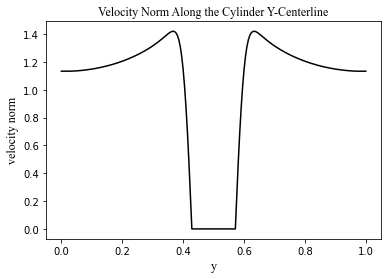

In [178]:
x_cylinder_mid=75
vel_on_x_cylinder_mid=grid_vel_x[x_cylinder_mid,:]
fig,ax=plt.subplots()
ax.plot(y_phsy,vel_on_x_cylinder_mid,"-k")
ax.set_xlabel("y",FontProperties=font)
ax.set_ylabel("velocity norm",FontProperties=font)
ax.set_title("Velocity Norm Along the Cylinder Y-Centerline",FontProperties=font)